In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
date = session.query(measurement).order_by(measurement.date.desc()).first()
date.date

'2017-08-23'

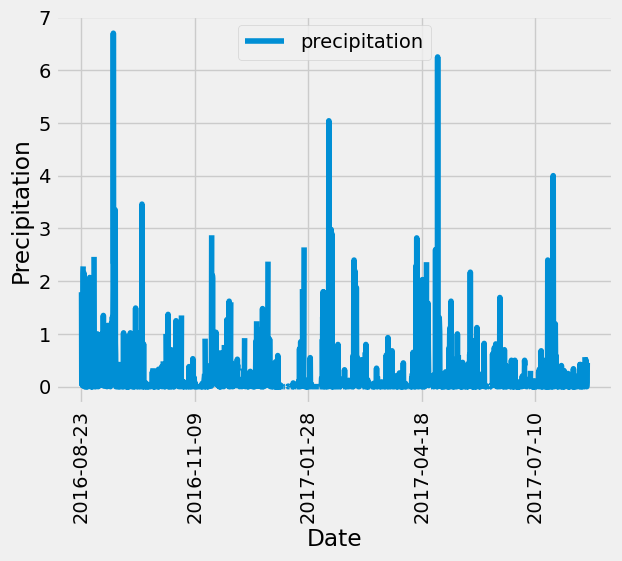

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date>= last_year_date).all()
data_list =  [{"date": value.date, "precipitation": value.prcp} for value in data]

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data_list, columns=["date", "precipitation"])
df1 = df.set_index('date')

# Sort the dataframe by date
df2 = df1.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df2.plot()
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.xticks(rotation ='vertical')
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
stats = df2.describe()
stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement).group_by(measurement.station).count()


9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations_data = session.query(measurement.station, func.count(measurement.station))\
                   .group_by(measurement.station).order_by(func.count(measurement.station)\
                                                                 .desc()).all() 

#List comprehension for the stations and count                                                            
active_stations = [station for station in active_stations_data]

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp = session.query(
    func.min(measurement.tobs),
    func.max(measurement.tobs),
    func.avg(measurement.tobs))\
    .filter(measurement.station == "USC00519281").all()

temp_list = [t for t in temp]
temp_list

[(54.0, 85.0, 71.66378066378067)]

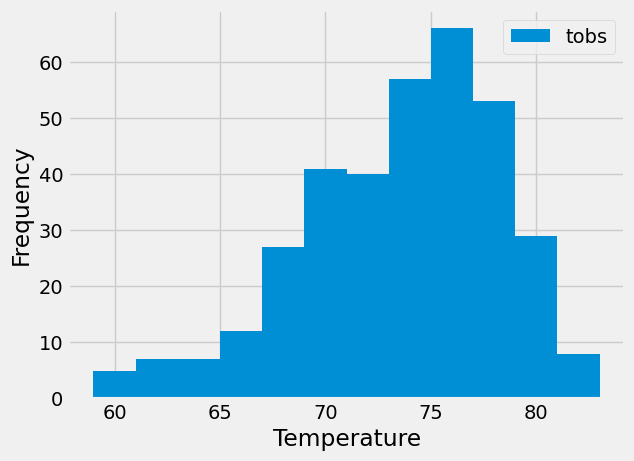

In [ ]:
# Using the most active station id
active_station = active_stations[0][0]

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement).filter(measurement.tobs).\
    filter(measurement.date >= last_year_date).\
        filter(measurement.station == active_station)

#Create a list comprehension for temperature
temp_data = [i.tobs for i in temp_data]

#Create a dataframe with temperature date
temp_df = pd.DataFrame(temp_data)

# Plot the histogram
plt.hist(temp_df, bins=12, label="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc='best')
plt.show()



# Close Session

In [24]:
# Close Session
session.close()